In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost
from sklearn.model_selection import cross_val_score, KFold
import joblib
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Training Data

In [3]:
training_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/male_players (legacy).csv')

<ipython-input-3-c485a8b09d25>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  training_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/male_players (legacy).csv')


# Load Testing Data

In [4]:
testing_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_22.csv')

<ipython-input-4-48830dcf94bf>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  testing_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_22.csv')


In [5]:
training_dataset

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [6]:
training_dataset.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)

In [7]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


In [8]:
training_dataset.shape

(161583, 110)

In [9]:
# Drop irrelevant columns in training data
irrelevant_columns_training = [
    'player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name',
    'long_name', 'dob', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name',
    'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date',
    'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id',
    'nation_position', 'nation_jersey_number', 'preferred_foot', 'real_face', 'release_clause_eur',
    'player_tags', 'mentality_composure', 'player_face_url', 'body_type', 'player_traits',
    'international_reputation', 'weak_foot', 'goalkeeping_speed'
]

# Drop irrelevant columns in the training dataset.

In [10]:
training_dataset.drop(irrelevant_columns_training, axis=1, inplace=True)

In [11]:
# training_dataset.drop(['player_id','player_url','fifa_version','fifa_update','fifa_update_date','short_name','long_name','dob','league_id','league_name','league_level','club_team_id','club_name','club_position','club_jersey_number','club_loaned_from','club_joined_date','club_contract_valid_until_year','nationality_id','nationality_name','nation_team_id','nation_position','nation_jersey_number','preferred_foot','real_face','player_tags','player_face_url','body_type','player_traits','international_reputation','goalkeeping_speed'], axis=1, inplace=True)

In [12]:
training_dataset

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,skill_moves,work_rate,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,CF,93,95,100500000.0,550000.0,27,169,67,4,Medium/Low,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,"LW, LM",92,92,79000000.0,375000.0,29,185,80,5,High/Low,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,"RM, LM, RW",90,90,54500000.0,275000.0,30,180,80,4,High/Low,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,ST,90,90,52500000.0,275000.0,32,195,95,4,Medium/Low,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,GK,90,90,63500000.0,300000.0,28,193,92,1,Medium/Medium,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,RW,46,61,110000.0,700.0,18,180,73,2,Medium/Medium,...,32+2,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2
161579,LB,46,58,110000.0,750.0,19,188,83,2,Medium/Medium,...,41+2,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2
161580,CDM,46,58,110000.0,500.0,19,181,73,2,High/Medium,...,45+2,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2
161581,"RW, LW",46,70,150000.0,500.0,17,175,68,2,Medium/Medium,...,30+2,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2


In [13]:
training_dataset.shape

(161583, 76)

In [14]:
# Drop irrelevant columns in testing data
irrelevant_columns_testing = [
    'sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'club_team_id', 'club_name',
    'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from',
    'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id',
    'nation_position', 'nation_jersey_number', 'preferred_foot', 'real_face', 'player_tags',
    'player_face_url', 'body_type', 'player_traits', 'club_logo_url', 'club_flag_url',
    'nation_logo_url', 'nation_flag_url', 'international_reputation'
]

In [15]:
testing_dataset.drop(irrelevant_columns_testing, axis=1, inplace=True)

In [16]:
# Remove attributes with more than 30% null values in training data
check_condition_training = 0.7 * len(training_dataset)
Selected_Training_Data = training_dataset.dropna(thresh=check_condition_training, axis=1)

In [17]:
# Remove attributes with more than 30% null values in testing data
check_condition_testing = 0.7 * len(testing_dataset)
Selected_Testing_Data = testing_dataset.dropna(thresh=check_condition_testing, axis=1)

In [18]:
# Impute null values using forward fill
Selected_Training_Data.fillna(method='ffill', inplace=True)
Selected_Testing_Data.fillna(method='ffill', inplace=True)


<ipython-input-18-7122012524f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selected_Testing_Data.fillna(method='ffill', inplace=True)


In [19]:
# Separate numeric and non-numeric columns in training data
numeric_cols_training = Selected_Training_Data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols_training = Selected_Training_Data.select_dtypes(include=['object']).columns

In [20]:
# Separate numeric and non-numeric columns in testing data
numeric_cols_testing = Selected_Testing_Data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols_testing = Selected_Testing_Data.select_dtypes(include=['object']).columns

In [21]:
# Impute null values using forward fill
Selected_Training_Data.fillna(method='ffill', inplace=True)


In [22]:
 # Columns within the two datasets to encode
common_columns = Selected_Training_Data.columns.intersection(Selected_Testing_Data.columns)
Selected_Training_Data = Selected_Training_Data[common_columns]
Selected_Testing_Data = Selected_Testing_Data[common_columns]

In [23]:
# Encode non-numeric columns in training data
for col in non_numeric_cols_training:
    Selected_Training_Data[col], _ = pd.factorize(Selected_Training_Data[col])

In [24]:
# Encode non-numeric columns in testing data
for col in non_numeric_cols_testing:
    Selected_Testing_Data[col], _ = pd.factorize(Selected_Testing_Data[col])

In [25]:
# Verify and update the list of numeric columns before scaling
numeric_cols_training = [col for col in numeric_cols_training if col in Selected_Training_Data.columns]
numeric_cols_testing = [col for col in numeric_cols_testing if col in Selected_Testing_Data.columns]

In [26]:
# Scale numeric columns in training data
scaler = StandardScaler()
Selected_Training_Data[numeric_cols_training] = scaler.fit_transform(Selected_Training_Data[numeric_cols_training])

In [27]:
# Scale numeric columns in testing data
Selected_Testing_Data[numeric_cols_testing] = scaler.transform(Selected_Testing_Data[numeric_cols_testing])

In [28]:
# Check the processed data
Selected_Training_Data

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,skill_moves,work_rate,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0,3.877514,3.875315,16.385163,24.627183,0.401872,-1.813330,-1.176360,2.221492,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.735485,3.396013,12.796730,16.633267,0.830120,0.556996,0.680668,3.551651,1,...,1,1,1,1,1,1,1,1,1,1
2,2,3.451428,3.076478,8.707584,12.065316,1.044244,-0.183731,0.680668,2.221492,1,...,2,2,2,2,2,2,2,2,2,2
3,3,3.451428,3.076478,8.373777,12.065316,1.472491,2.038450,2.823392,2.221492,0,...,3,3,3,3,3,3,3,3,3,3
4,4,3.451428,3.076478,10.209719,13.207304,0.615996,1.742159,2.394847,-1.768985,2,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,39,-2.797832,-1.556774,-0.370318,-0.464576,-1.525244,-0.183731,-0.319270,-0.438826,2,...,299,299,299,354,375,352,352,352,375,8
161579,48,-2.797832,-2.036076,-0.370318,-0.462292,-1.311120,1.001432,1.109212,-0.438826,2,...,336,336,336,374,304,86,86,86,304,9
161580,29,-2.797832,-2.036076,-0.370318,-0.473712,-1.311120,-0.035585,-0.319270,-0.438826,3,...,348,348,348,288,290,11,11,11,290,8
161581,68,-2.797832,-0.118868,-0.363642,-0.473712,-1.739368,-0.924457,-1.033512,-0.438826,2,...,296,296,296,24,37,273,273,273,37,9


In [29]:
Selected_Testing_Data

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,skill_moves,work_rate,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0,3.877514,3.555780,12.629826,14.120894,1.900739,-1.665184,-0.462119,2.221492,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.735485,3.396013,19.556337,11.836918,1.472491,0.556996,0.823516,2.221492,1,...,1,1,1,1,0,1,1,1,0,0
2,2,3.593457,3.236246,7.121998,11.836918,2.328987,0.853287,1.109212,3.551651,2,...,2,2,2,2,1,2,2,2,1,1
3,3,3.593457,3.236246,21.141924,11.836918,0.830120,-0.924457,-1.033512,3.551651,1,...,3,3,3,3,2,0,0,0,2,1
4,4,3.593457,3.236246,20.557760,15.491279,1.044244,-0.035585,-0.747815,2.221492,3,...,4,4,4,4,3,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,9,-2.655804,-2.994680,-0.376994,-0.450872,-0.668748,-0.183731,-1.604905,-0.438826,4,...,136,136,136,104,87,131,131,131,87,45
19235,14,-2.655804,-1.876309,-0.370318,-0.473712,-1.311120,-0.924457,-0.747815,-0.438826,4,...,136,136,136,99,87,121,121,121,87,26
19236,14,-2.655804,-2.515378,-0.371987,-0.473712,-0.882872,-0.480021,-0.462119,-0.438826,4,...,136,136,136,115,98,87,87,87,98,44
19237,1,-2.655804,-1.716541,-0.370318,-0.473712,-1.311120,-1.220748,-1.319208,-0.438826,4,...,84,84,84,95,79,105,105,105,79,45


In [47]:
# Splitting the data into independent variable(X_train) and dependent variable(y_train)
#dropping the dependent variables from the dataset.

independent_variables = Selected_Training_Data.drop('overall', axis = 1)

#extracting the target variable so that we can run a correlation study on the independent
dependent_variable = pd.DataFrame(Selected_Training_Data['overall'], columns = ['overall'])

In [48]:
# Calculate correlation between each feature and the dependent variable
correlations = Selected_Training_Data.corr()['overall'].abs().sort_values(ascending=False)

In [49]:
correlations

overall                    1.000000
movement_reactions         0.845753
potential                  0.695362
passing                    0.685266
wage_eur                   0.611123
                             ...   
goalkeeping_kicking        0.015521
goalkeeping_diving         0.013603
goalkeeping_reflexes       0.011783
goalkeeping_handling       0.010862
goalkeeping_positioning    0.004731
Name: overall, Length: 76, dtype: float64

In [50]:
# Selecting the top 15 features with the highest correlation
N = 15
top_features = correlations.nlargest(N).index

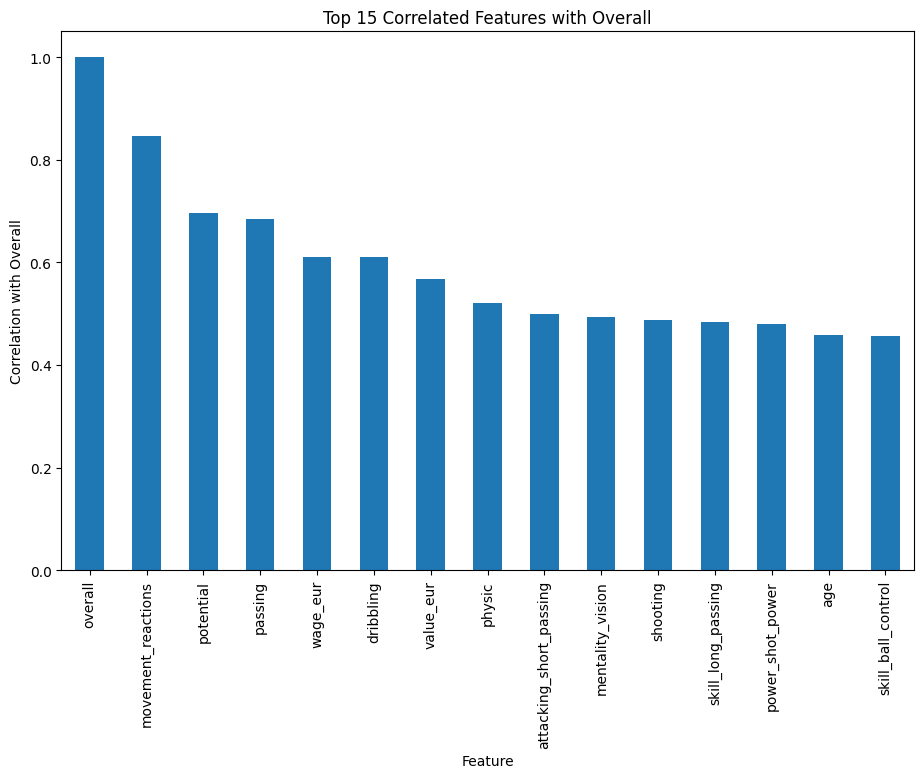

In [51]:
# Visualizing top correlated features
import matplotlib.pyplot as plt

# Plot the top correlated features
plt.figure(figsize=(11, 7))
correlations.nlargest(N).plot(kind='bar')
plt.title('Top {} Correlated Features with Overall'.format(N))
plt.xlabel('Feature')
plt.ylabel('Correlation with Overall')
plt.show()

In [52]:
#creating a feature subset using the top correlated features
feature_subset = Selected_Training_Data[top_features]


In [53]:
feature_subset

,overall,movement_reactions,potential,passing,wage_eur,dribbling,value_eur,physic,attacking_short_passing,mentality_vision,shooting,skill_long_passing,power_shot_power,age,skill_ball_control
0,3.877514,3.535775,3.875315,2.768559,24.627183,3.298195,16.385163,-0.175232,2.086204,2.588430,2.648780,1.536683,1.499832,0.401872,2.281310
1,3.735485,3.099571,3.396013,2.294765,16.633267,2.814595,12.796730,1.461333,1.609554,1.957672,2.935798,1.273977,2.401757,0.830120,2.039859
2,3.451428,2.990520,3.076478,2.484283,12.065316,2.911315,8.707584,-0.072947,1.881925,2.167924,2.433517,1.536683,1.886371,1.044244,1.919133
3,3.451428,2.554317,3.076478,2.294765,12.065316,2.330994,8.373777,2.177331,1.745740,2.097840,2.792289,1.536683,2.337334,1.472491,1.919133
4,3.451428,2.990520,3.076478,2.294765,13.207304,2.330994,10.209719,2.177331,-1.114157,-2.317466,2.792289,-0.761996,-0.948252,0.615996,-1.642271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,-2.797832,-2.462022,-1.556774,-1.590342,-0.464576,-1.441087,-0.370318,-2.118654,-1.386528,-0.775613,-0.293146,-1.287408,0.469059,-1.525244,-0.797192
161579,-2.797832,-2.134869,-2.036076,-2.632689,-0.462292,-2.698447,-0.370318,-0.788944,-1.931270,-1.546539,-1.943495,-1.812820,-1.528062,-1.311120,-1.581909
161580,-2.797832,-1.262462,-2.036076,-1.306066,-0.473712,-1.537807,-0.370318,-1.198085,-0.501322,-0.915781,-1.154198,-0.630643,-0.368443,-1.311120,-1.400820
161581,-2.797832,-1.807717,-0.118868,-1.969377,-0.473712,-1.537807,-0.363642,-2.323224,-1.250342,-0.635445,-0.149638,-1.747144,-0.948252,-1.739368,-0.917918


# Model Development

In [54]:
X = feature_subset.drop(columns=['overall'])
y = feature_subset['overall']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training First Model

In [56]:
from sklearn.model_selection import KFold, cross_val_score

In [57]:
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [58]:
# XGBoost Regression
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-xgb_scores.mean())
xgb_model.fit(X_train, y_train)
score = xgb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, xgb_model.predict(X_test))

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(xgb_model.predict(X_test)))
print("prediction: \n", xgb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.1290
size of prediction:  32317
prediction: 
 [-0.32042462 -0.3001665   0.50612056 ... -1.3480768  -0.2865986
 -1.442897  ]
test score: 0.9834



# Training Second Model

In [59]:
#  Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores.mean())

rf_model.fit(X_train, y_train)
score = rf_model.score(X_test, y_test)
mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(rf_model.predict(X_test)))
print("prediction: \n", rf_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.0148
size of prediction:  32317
prediction: 
 [-0.71995327 -0.27966449  0.38644984 ... -1.35056043 -0.38902654
 -1.72409575]
test score: 0.9852



# Training Third Model

In [60]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=4, min_samples_split=2, learning_rate=0.01)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_scores.mean())
gb_model.fit(X_train, y_train)
score = gb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, gb_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(gb_model.predict(X_test)))
print("prediction: \n", gb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.0258
size of prediction:  32317
prediction: 
 [-0.68175821 -0.26699463  0.4337344  ... -1.24454321 -0.33842273
 -1.59727296]
test score: 0.9742



# Training Fourth Model

In [61]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


dt_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}
grid_search = GridSearchCV(dt_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
gs_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gs_rmse = np.sqrt(-gs_scores.mean())
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

score = best_dt_model.score(X_test, y_test)
mse = mean_squared_error(y_test, best_dt_model.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(best_dt_model.predict(X_test)))
print("prediction: \n", best_dt_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.0269
size of prediction:  32317
prediction: 
 [-0.54115499 -0.38334539  0.36230497 ... -1.27609684 -0.38334539
 -2.19421055]
test score: 0.9731



# Optimization On Models

In [62]:
# Using GridSearchCV for Hyperparameter Tuning of Each Model

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Fine-tuning the Random Forest Regressor model using GridSearchCV
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(rf_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

improved_rf = grid_search.best_estimator_

score = improved_rf.score(X_test, y_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_rf.predict(X_test))

print("MSE: %.4f" % mse)
print("Size of prediction: ", len(improved_rf.predict(X_test)))
print("Prediction: \n", improved_rf.predict(X_test))
print("Test score: {0:.4f}\n".format(score))

# Ensembling

In [ ]:
# import
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define the base models
voting_regressor = VotingRegressor([
    ('xgb', improved_xgb),
    ('gb_model', gb_model),
    ('rf_model', improved_rf)
])

# Train the voting regressor
voting_regressor.fit(X_train, y_train)

# Predictions from the voting regressor
voting_pred = voting_regressor.predict(X_test)

# Function to print performance metrics
def print_performance(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# Evaluate the performance of the voting regressor
print_performance("Voting Ensemble", y_test, voting_pred)

# Note: All necessary data preprocessing for the training and testing data
# is already done in the beginning.

In [ ]:
# Define the target column
target_column = 'overall'

# Separate features and target variable
X_test_new = Selected_Testing_Data.drop(target_column, axis=1)
y_test_new = Selected_Testing_Data[target_column]

# Ensure the same order of columns as in training data
X_test_new = X_test_new[X_train.columns]

# Make predictions with the voting regressor
players_22_pred = voting_regressor.predict(X_test_new)

# Evaluate the performance
def print_performance(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

print_performance("Voting Ensemble on players_22", y_test_new, players_22_pred)

In [ ]:
# Preparing and Saving The trained ensemble mode
# Save the voting regressor and the scaler
joblib.dump(voting_regressor, 'voting_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')